In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/데사프/data')

In [3]:
os.listdir()

['data_2019.csv', 'data_2020.csv', 'data_2021.csv']

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,680 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122532 files and di

In [4]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import rcParams

In [5]:
kw19 = pd.read_csv('data_2019.csv')
kw20 = pd.read_csv('data_2020.csv')
kw21 = pd.read_csv('data_2021.csv')


In [6]:
kw19.head()

,SN,WRINVSTG_NO,DPRS_CNT,INJPSN_CNT,HNL_DMGE_CNT,PRPRTY_DMGE_AMT,UPRINSTT_NM,FRSTT_NM,WARD_NM,LFDAU_NM,...,SOLDIER_CNT,ELCTY_GAS_INSTT_CNT,ETC_CNT,MBLZ_EQPMN_CNT,WETHR,TP,HUMIDITY,TIME_UNIT_WS,TIME_UNIT_WD,SPCNWS_CN
0,1,1.901040e+14,0,0,0,1990745,강원소방본부,양양소방서,양양119안전센터,NaN,...,760,89,51,123,맑음,2.0,19,270,4.0,NaN
1,2,1.901100e+14,0,0,0,0,강원소방본부,고성소방서,동광119안전센터,NaN,...,2,40,0,27,구름조금,5.0,19,45,8.0,NaN
2,3,1.901200e+14,0,0,0,0,강원소방본부,강릉소방서,내곡119안전센터,NaN,...,0,20,0,14,맑음,2.0,56,0,4.0,NaN
3,4,1.901200e+14,0,0,0,1,강원소방본부,춘천소방서,신북119안전센터,NaN,...,5,0,0,12,맑음,2.0,30,225,4.0,풍랑주의보
4,5,1.901220e+14,0,0,0,3162,강원소방본부,태백소방서,철암119안전센터,NaN,...,4,30,0,24,구름조금,3.0,31,135,4.0,NaN


In [7]:
columns_to_keep = ['TIME_UNIT_WS' ,'TIME_UNIT_WD']
kw19 = kw19[columns_to_keep]
kw20 = kw20[columns_to_keep]
kw21 = kw21[columns_to_keep]

kw19.head()

,TIME_UNIT_WS,TIME_UNIT_WD
0,270,4.0
1,45,8.0
2,0,4.0
3,225,4.0
4,135,4.0


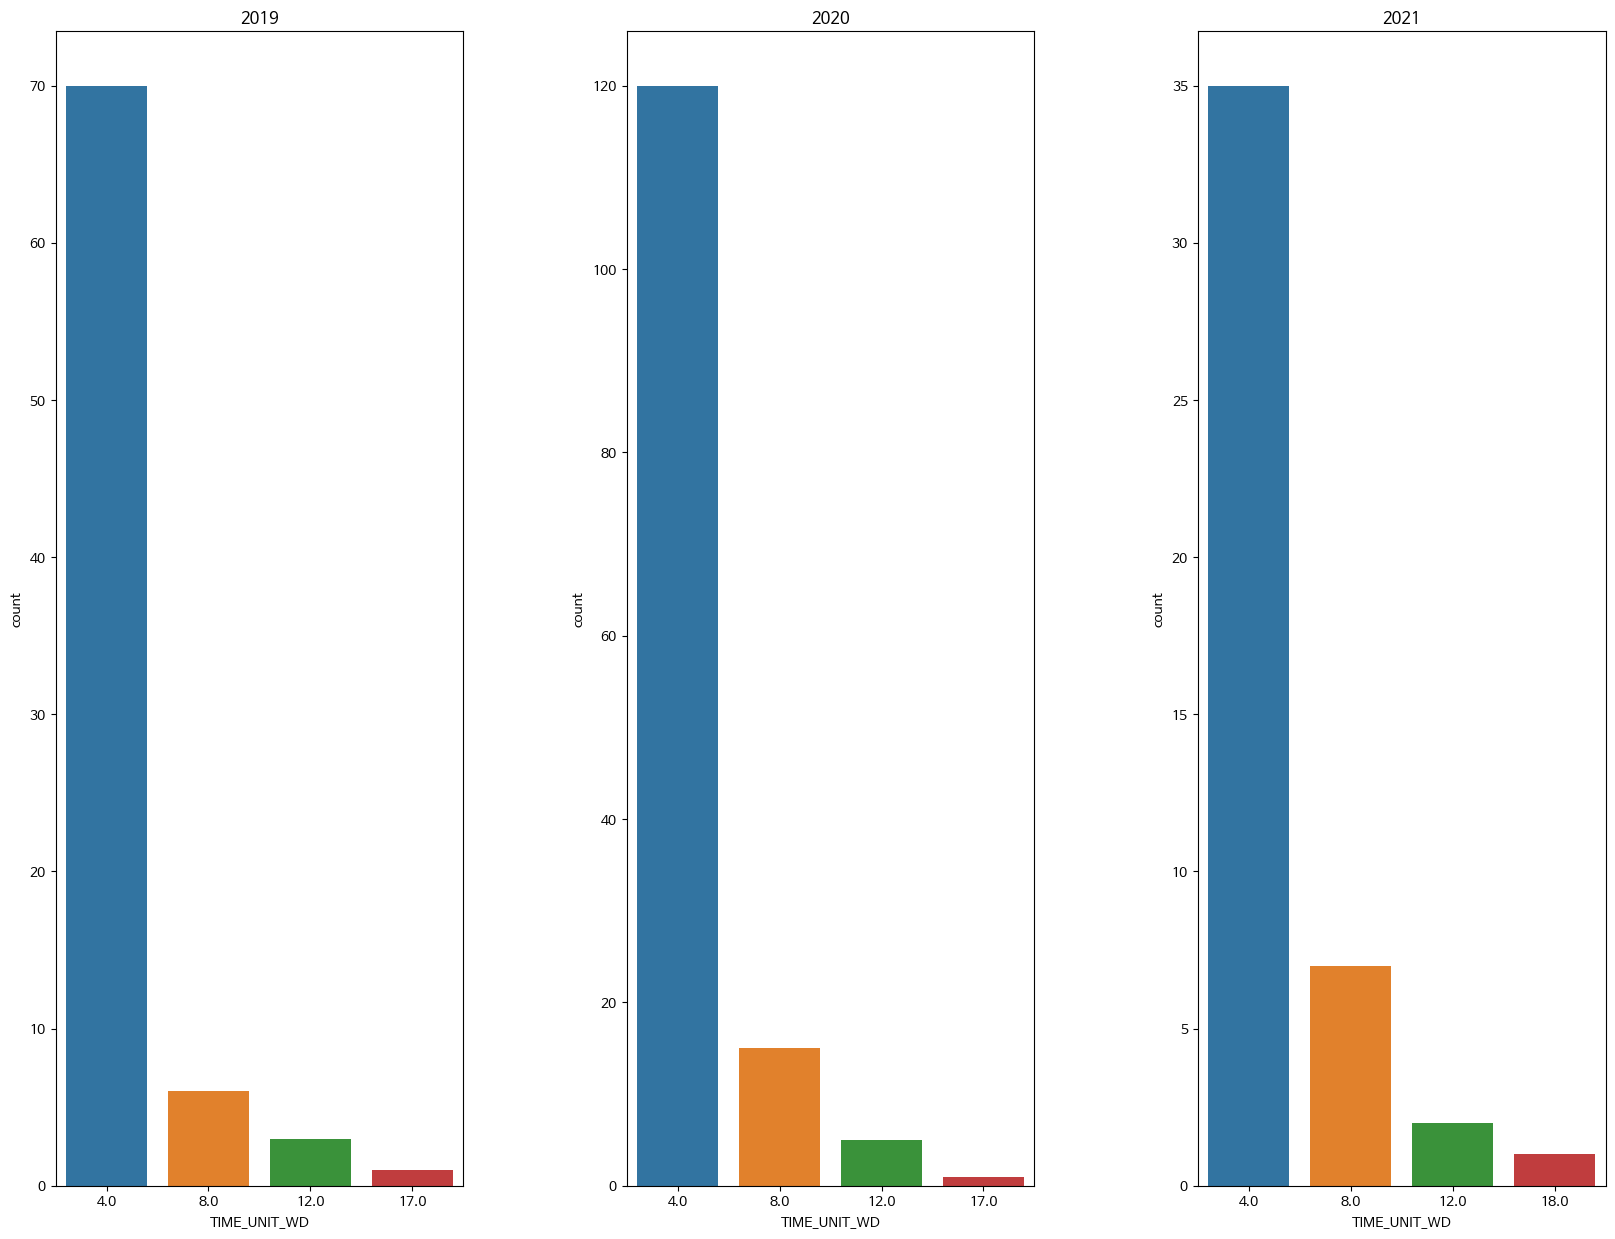

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

# 첫 번째 그래프
sns.countplot(x='TIME_UNIT_WD', data=kw19, ax=ax[0])
ax[0].set_title('2019')

# 두 번째 그래프
sns.countplot(x='TIME_UNIT_WD', data=kw20, ax=ax[1])
ax[1].set_title('2020')

# 세 번째 그래프
sns.countplot(x='TIME_UNIT_WD', data=kw21, ax=ax[2])
ax[2].set_title('2021')

fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


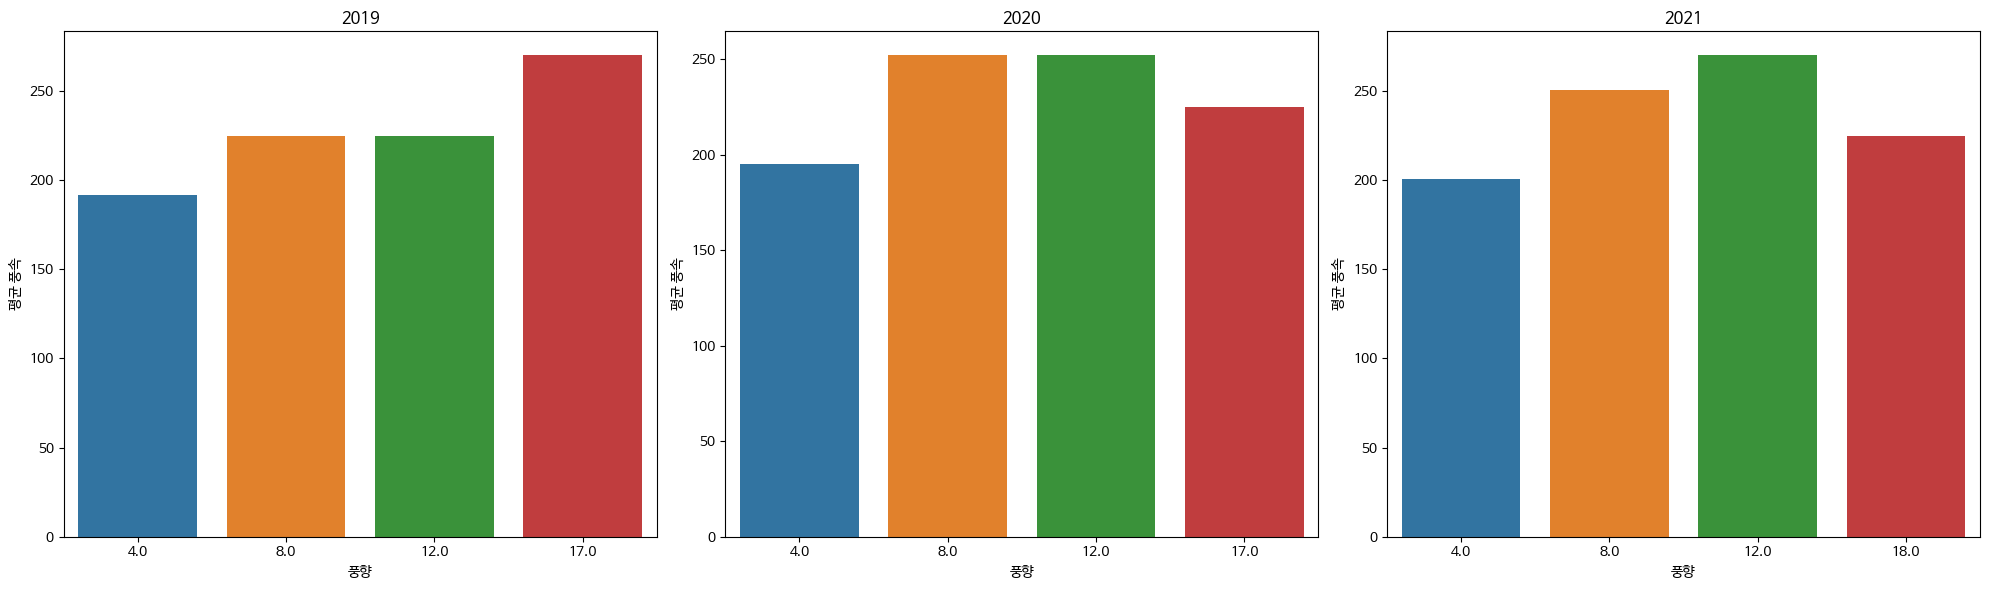

In [ ]:
# 데이터프레임 kw19, kw20, kw21에 대해 처리
data_frames = [kw19, kw20, kw21]

# subplot 생성
fig, ax = plt.subplots(nrows=1, ncols=len(data_frames), figsize=(20, 6))

for i, df in enumerate(data_frames):
    # TIME_UNIT_WD에 따른 평균 TIME_UNIT_WS 계산
    avg_ws_by_wd = df.groupby('TIME_UNIT_WD')['TIME_UNIT_WS'].mean().reset_index()

    # 시각화
    sns.barplot(x='TIME_UNIT_WD', y='TIME_UNIT_WS', data=avg_ws_by_wd, ax=ax[i])
    ax[i].set_xlabel('풍향')
    ax[i].set_ylabel('평균 풍속')
    ax[i].set_title('{}'.format(2019+i))

# 그래프 간격 조정
plt.tight_layout()
plt.show()
